<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/2_customer_loyalty_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. 고객 충성도 분석(vip)
* 1번(vip고객 식별) 문제와 비슷한 문제로, 가장 최근 구매와 직전 구매까지의 기간을 분석.
* 구매 주기의 기간이 짧을 수록 충성도가 높은 고객으로 볼 수 있으며, 총 구매 순위와 같이 연관지어 분석 가능.


#### 회사에서 취할 수 있는 전략
* **VIP 고객 프로그램 개발** : 총 주문 수가 많은 상위 고객을 대상으로 VIP 고객 프로그램을 개발해 충성도를 더욱 강화. 예시) 특별 할인 / 개인 맞춤형 서비스 / 우선적 고객 지원 등.
* **재구매 유도 전략** : 마지막 구매 이후 오랜 시간이 지난 고객을 대상으로 재구매를 유도하는 마케팅 캠페인 실시. 예시) 이메일 마케팅, 리타겟팅 광고, 특별 프로모션 제공 등을 통해 재유치 가능.
* **고객 피드백 수집 및 분석** : 고객 충성도와 구매 행동에 대한 심층적인 이해를 위해 고객 피드백을 수집 및 분석 필요. 이를 통해 제품이나 서비스의 개선점을 찾고, 고객 만족도를 높일 수 있는 방안 모색.
* **고객 세분화에 기반한 맞춤형 마케팅** : 고객의 구매 패턴, 선호도, 마지막 구매 이후 경과된 시간 등 다양한 데이터를 기반으로 고객 세분화를 수행하고, 각 세그먼트별로 맞춤형 마케팅 전략 수립.


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# MySQL 데이터베이스 연결 설정
conn = mysql.connector.connect(r
    host='localhost',
    user='root',
    password='password',  # 실제 비밀번호로 변경하세요
    database='classicmodels'
)

# 고객 충성도 분석 쿼리 실행
loyalty_query = """
SELECT
    customerNumber,
    COUNT(orderNumber) AS total_orders,
    MAX(orderDate) AS last_order_date
FROM orders
GROUP BY customerNumber
ORDER BY total_orders DESC;
"""

loyalty_df = pd.read_sql_query(loyalty_query, conn)
display(loyalty_df)

# 연결 종료
conn.close()

C:\Users\user\AppData\Local\Temp\ipykernel_16648\29255184.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  loyalty_df = pd.read_sql_query(loyalty_query, conn)


,customerNumber,total_orders,last_order_date
0,141,26,2005-05-31
1,124,17,2005-05-29
2,114,5,2004-11-29
3,353,5,2005-03-30
4,145,5,2005-04-15
...,...,...,...
93,487,2,2004-02-10
94,489,2,2004-01-22
95,495,2,2004-04-26
96,455,2,2004-05-04


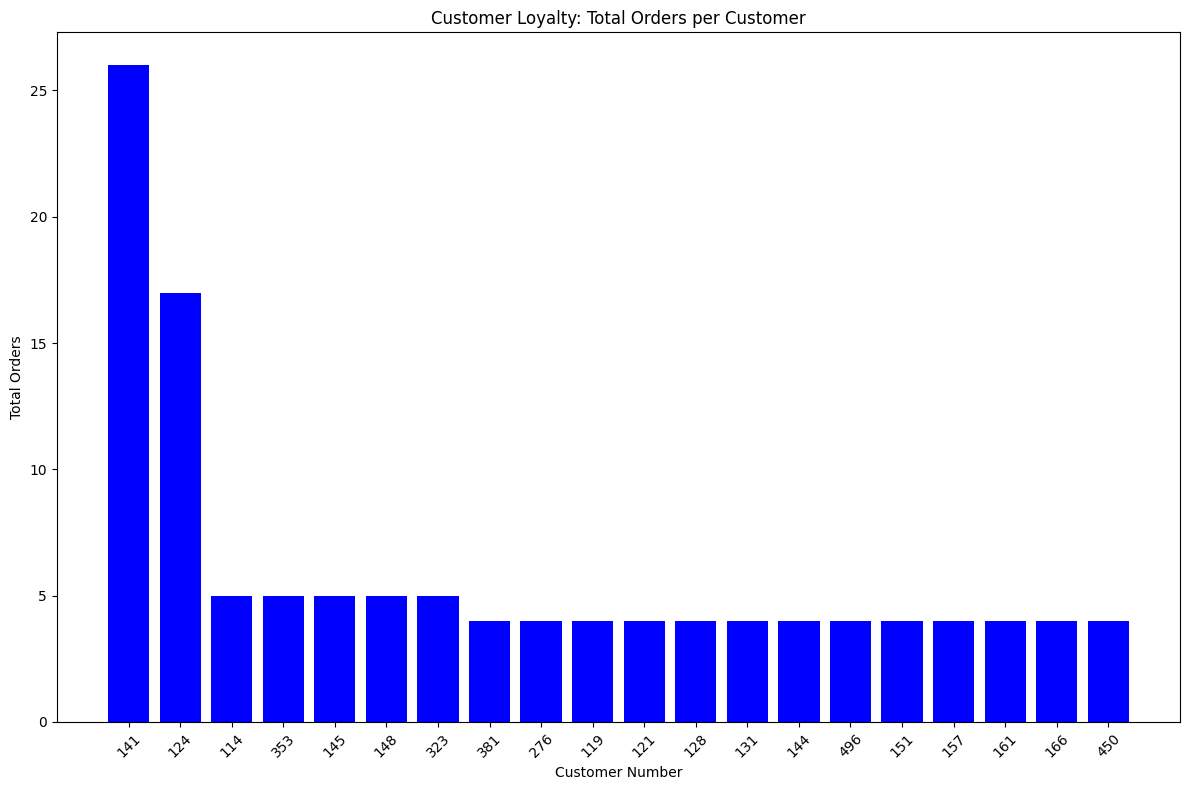

In [ ]:
# 고객별 총 주문 수 시각화 (고객 번호 사용)
plt.figure(figsize=(12, 8))

# 여기서는 clarity를 위해 상위 20명의 고객만 표시합니다. 전체 데이터셋에서는 이 부분을 조정해야 할 수 있습니다.
top_20_customers = loyalty_df.head(20)
plt.bar(top_20_customers['customerNumber'].astype(str), top_20_customers['total_orders'], color='blue')
plt.xlabel('Customer Number')
plt.ylabel('Total Orders')
plt.title('Customer Loyalty: Total Orders per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 모든 고객의 마지막 구매일로부터 경과된 일수 저장 > days_since_last_order
# pd.to_datetime 객체 변환
# .dt.days 속성은 timedelta객체를 일수로 변환

latest_order_date = loyalty_df['last_order_date'].max()
loyalty_df['days_since_last_order'] = (pd.to_datetime(latest_order_date) - pd.to_datetime(loyalty_df['last_order_date'])).dt.days

display(latest_order_date)
display(loyalty_df)

datetime.date(2005, 5, 31)

,customerNumber,total_orders,last_order_date,days_since_last_order
0,141,26,2005-05-31,0
1,124,17,2005-05-29,2
2,114,5,2004-11-29,183
3,353,5,2005-03-30,62
4,145,5,2005-04-15,46
...,...,...,...,...
93,487,2,2004-02-10,476
94,489,2,2004-01-22,495
95,495,2,2004-04-26,400
96,455,2,2004-05-04,392


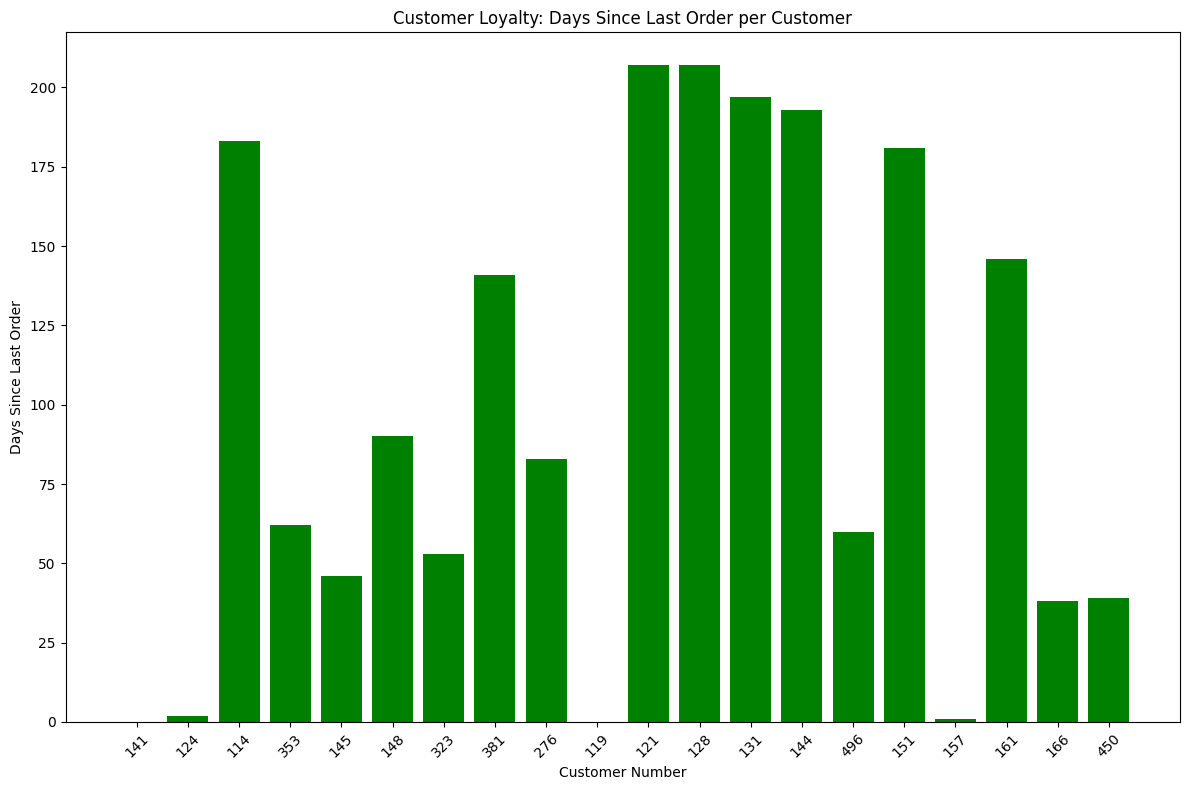

In [ ]:
# 고객별 마지막 구매로부터 경과된 일수 시각화 (고객 번호 사용)
plt.figure(figsize=(12, 8))

# 상위 20명의 고객에 대해 시각화를 수행합니다. 전체 데이터셋에서는 이 부분을 조정해야 할 수 있습니다.
top_20_customers = loyalty_df.head(20)
plt.bar(top_20_customers['customerNumber'].astype(str), top_20_customers['days_since_last_order'], color='green')
plt.xlabel('Customer Number')
plt.ylabel('Days Since Last Order')
plt.title('Customer Loyalty: Days Since Last Order per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()